In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import BatchNormalization
import pydot
import graphviz

Total Classes Detected: 10
Importing Classes .......
0 1 2 3 4 5 6 7 8 9  
Total Images in Images List =  9894
Total IDS in classNo List=  9894
(9894, 32, 32, 3)
(6332, 32, 32, 3)
(1979, 32, 32, 3)
(1583, 32, 32, 3)
[46, 681, 713, 716, 693, 690, 703, 704, 683, 703]


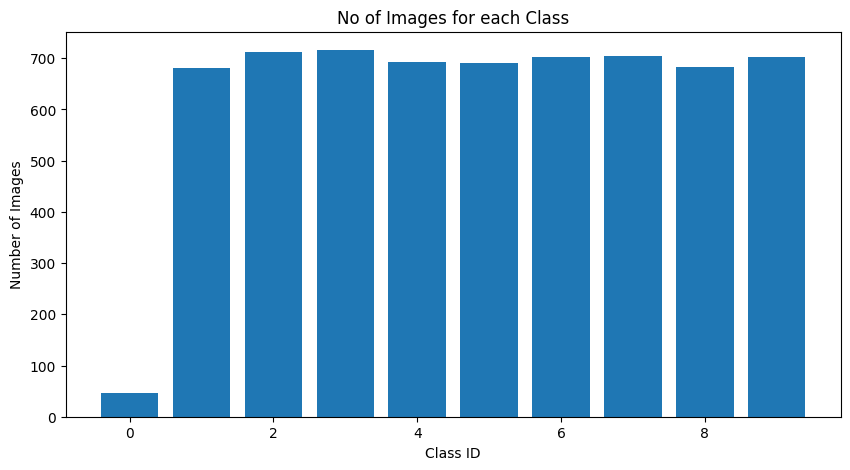

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

c:\Users\ayush\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\ayush\AppData\Local\Temp\ipykernel_24992\1761637724.py:136: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(dataGen.flow(X_train,y_train,


None
Epoch 1/15
197/197 [==============================] - 24s 120ms/step - loss: 1.1552 - accuracy: 0.5854 - val_loss: 0.1714 - val_accuracy: 0.9394
Epoch 2/15
197/197 [==============================] - 16s 82ms/step - loss: 0.3903 - accuracy: 0.8730 - val_loss: 0.0836 - val_accuracy: 0.9747
Epoch 3/15
197/197 [==============================] - 15s 75ms/step - loss: 0.2549 - accuracy: 0.9163 - val_loss: 0.0751 - val_accuracy: 0.9773
Epoch 4/15
197/197 [==============================] - 15s 74ms/step - loss: 0.1927 - accuracy: 0.9397 - val_loss: 0.0500 - val_accuracy: 0.9817
Epoch 5/15
197/197 [==============================] - 15s 75ms/step - loss: 0.1760 - accuracy: 0.9454 - val_loss: 0.0547 - val_accuracy: 0.9836
Epoch 6/15
197/197 [==============================] - 17s 87ms/step - loss: 0.1564 - accuracy: 0.9510 - val_loss: 0.0420 - val_accuracy: 0.9886
Epoch 7/15
197/197 [==============================] - 20s 100ms/step - loss: 0.1424 - accuracy: 0.9589 - val_loss: 0.0256 - val_ac

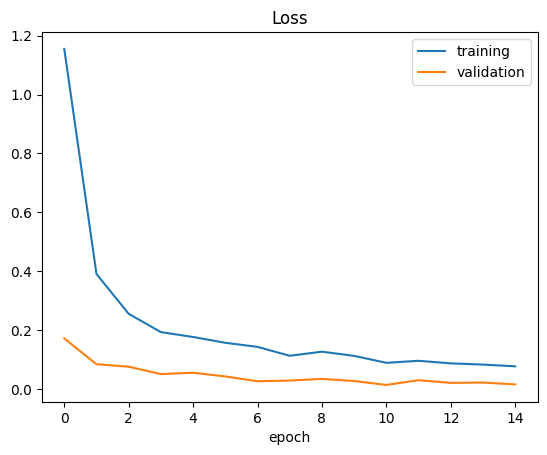

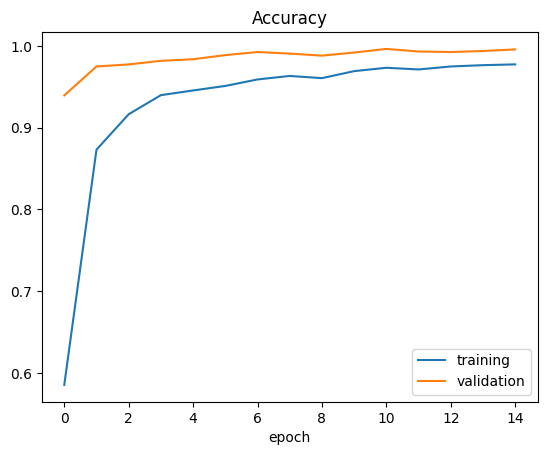

Test Score =  0.010265473276376724
Test Accuracy = 0.996968150138855


In [2]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle

################ PARAMETERS ########################
path = 'Digits_new'
testRatio = 0.2
valRatio = 0.2
imageDimensions= (32,32,3)
batchSizeVal= 32
epochsVal = 15
# stepsPerEpochVal = 2000
# stepsPerEpochVal=len(X_train) // 32
####################################################

#### IMPORTING DATA/IMAGES FROM FOLDERS 
count = 0
images = []     # LIST CONTAINING ALL THE IMAGES 
classNo = []    # LIST CONTAINING ALL THE CORRESPONDING CLASS ID OF IMAGES 
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)
print("Importing Classes .......")
for x in range (0,noOfClasses):
    myPicList = os.listdir(path+"/"+str(x))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(x)+"/"+y)
        curImg = cv2.resize(curImg,(32,32))
        images.append(curImg)
        classNo.append(x)
    print(x,end= " ")
print(" ")
print("Total Images in Images List = ",len(images))
print("Total IDS in classNo List= ",len(classNo))

#### CONVERT TO NUMPY ARRAY 
images = np.array(images)
classNo = np.array(classNo)
print(images.shape)

#### SPLITTING THE DATA
X_train,X_test,y_train,y_test = train_test_split(images,classNo,test_size=testRatio)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=valRatio)
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)
stepsPerEpochVal=len(X_train) // 32
#### PLOT BAR CHART FOR DISTRIBUTION OF IMAGES
numOfSamples= []
for x in range(0,noOfClasses):
    #print(len(np.where(y_train==x)[0]))
    numOfSamples.append(len(np.where(y_train==x)[0]))
print(numOfSamples)

plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses),numOfSamples)
plt.title("No of Images for each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

#### PREPOSSESSING FUNCTION FOR IMAGES FOR TRAINING 
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img
# img = preProcessing(X_train[30])
# img = cv2.resize(img,(300,300))
# cv2.imshow("PreProcesssed",img)
# cv2.waitKey(0)

X_train= np.array(list(map(preProcessing,X_train)))
X_test= np.array(list(map(preProcessing,X_test)))
X_validation= np.array(list(map(preProcessing,X_validation)))


#### RESHAPE IMAGES 
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)

#### IMAGE AUGMENTATION 
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(X_train)

#### ONE HOT ENCODING OF MATRICES
y_train = to_categorical(y_train,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)

#### CREATING THE MODEL 
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3, 3)
    sizeOfPool = (2,2)
    noOfNodes= 500

    model = Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape=(imageDimensions[0],
                      imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(noOfFilters, sizeOfFilter1, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add((Conv2D(noOfFilters//2, sizeOfFilter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(noOfNodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation='softmax'))

    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model = myModel()
print(model.summary())

#### STARTING THE TRAINING PROCESS
history = model.fit_generator(dataGen.flow(X_train,y_train,
                                 batch_size=batchSizeVal),
                                 steps_per_epoch=stepsPerEpochVal,
                                 epochs=epochsVal,
                                 validation_data=(X_validation,y_validation),
                                 shuffle=1)

#### PLOT THE RESULTS  
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

#### EVALUATE USING TEST IMAGES
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

#### SAVE THE TRAINED MODEL 
model.save('model_trained.h5')  # Save as HDF5 file

In [2]:
# Scan the Digits
# First Data Augmentation
#Then Classify them
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
path='Digits_new'
myList=os.listdir(path)
print(myList)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [4]:
images=[]
labels=[]
num_classes=len(myList)
print(num_classes)

10


In [5]:
print("Total Classes Detected: ",num_classes)
for i in range(num_classes):
    #get number of images in each folder
    my_images=os.listdir(os.path.join(path,myList[i]))
    print("Total Images in Class ",myList[i],": ",len(my_images))

Total Classes Detected:  10
Total Images in Class  0 :  75
Total Images in Class  1 :  1091
Total Images in Class  2 :  1091
Total Images in Class  3 :  1091
Total Images in Class  4 :  1091
Total Images in Class  5 :  1091
Total Images in Class  6 :  1091
Total Images in Class  7 :  1091
Total Images in Class  8 :  1091
Total Images in Class  9 :  1091


In [ ]:
#No need of Data Augmentation since we have enough data which is already augmented
for i in range(num_classes):
    my_images=os.listdir(os.path.join(path,myList[i]))
    for y in my_images:
        image=cv2.imread(os.path.join(path,myList[i],y))
        if image is not None:
            image=cv2.resize(image,(32,32))
            images.append(image)
            labels.append(i)
        else:
            print(f"Image {y} in class {myList[i]} could not be read.")
    print(f"Processed {len(my_images)} images in class {myList[i]}.")

Processed 75 images in class 0.
Processed 1091 images in class 1.
Processed 1091 images in class 2.
Processed 1091 images in class 3.
Processed 1091 images in class 4.
Processed 1091 images in class 5.
Processed 1091 images in class 6.
Processed 1091 images in class 7.
Processed 1091 images in class 8.
Processed 1091 images in class 9.


In [7]:
images = np.array(images)
labels = np.array(labels)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(images,labels, test_size=0.2, random_state=42, stratify=labels)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=Y_train)

In [9]:
print("Training set size:", X_train.shape, Y_train.shape)
print("Validation set size:", X_validation.shape, Y_validation.shape)
print("Test set size:", X_test.shape, Y_test.shape)

Training set size: (6332, 64, 64, 3) (6332,)
Validation set size: (1583, 64, 64, 3) (1583,)
Test set size: (1979, 64, 64, 3) (1979,)


In [10]:
def preProcessing(img):
    # Convert to grayscale if needed (handles both 3-channel BGR and 1-channel grayscale)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Ensure the image is uint8 (0-255) before histogram equalization
    if img.dtype != 'uint8':
        img = (img * 255).astype('uint8')  # If already in [0,1], scale back to [0,255]
    
    # Apply histogram equalization
    img = cv2.equalizeHist(img)
    
    # Normalize to [0,1] for neural networks
    img = img / 255.0
    
    return img

In [11]:
X_train = np.array(list(map(preProcessing, X_train)))
X_test = np.array(list(map(preProcessing, X_test)))
X_validation = np.array(list(map(preProcessing, X_validation)))


In [12]:
print("Training set size:", X_train[0].shape, Y_train.shape)
# Reshape data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)

Training set size: (64, 64) (6332,)


In [13]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(Y_train),y=Y_train)
class_weights = dict(enumerate(class_weights))
print("\nClass weights:", class_weights)


Class weights: {0: 13.191666666666666, 1: 0.907163323782235, 2: 0.9058655221745351, 3: 0.907163323782235, 4: 0.907163323782235, 5: 0.907163323782235, 6: 0.907163323782235, 7: 0.907163323782235, 8: 0.9058655221745351, 9: 0.907163323782235}


In [14]:
#Image Augmentation
train_datagenerator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10,
    horizontal_flip=False,
    vertical_flip=False
)

In [15]:
train_datagenerator.fit(X_train)

In [16]:
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
Y_validation = to_categorical(Y_validation, num_classes)

In [ ]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(32,32,1)),BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'), BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'), BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes,activation='softmax')        
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [21]:
model=create_model()
print("\nModel Summary:")
model.summary()
# plot_model(model, to_file='modelppp.png',show_shapes=True, show_layer_names=True)


Model Summary:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 batch_normalization_9 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


Training Model...
Epoch 1/30
197/197 [==============================] - 34s 169ms/step - loss: 0.8739 - accuracy: 0.7037 - val_loss: 4.8467 - val_accuracy: 0.1181
Epoch 2/30
197/197 [==============================] - 40s 202ms/step - loss: 0.3072 - accuracy: 0.8978 - val_loss: 1.4905 - val_accuracy: 0.6304
Epoch 3/30
197/197 [==============================] - 27s 135ms/step - loss: 0.2121 - accuracy: 0.9311 - val_loss: 0.1470 - val_accuracy: 0.9659
Epoch 4/30
197/197 [==============================] - 27s 136ms/step - loss: 0.1549 - accuracy: 0.9533 - val_loss: 0.0418 - val_accuracy: 0.9880
Epoch 5/30
197/197 [==============================] - 28s 142ms/step - loss: 0.1352 - accuracy: 0.9562 - val_loss: 0.0354 - val_accuracy: 0.9912
Epoch 6/30
197/197 [==============================] - 27s 136ms/step - loss: 0.1158 - accuracy: 0.9624 - val_loss: 0.0471 - val_accuracy: 0.9880
Epoch 7/30
197/197 [==============================] - 28s 140ms/step - loss: 0.1042 - accuracy: 0.9648 - val_lo

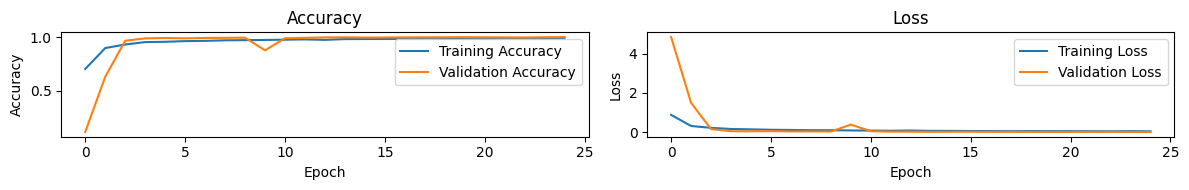


Evaluating model...
Test Accuracy: 0.9985
Test Loss: 0.0048
Model saved as Sudoku Solver Model.h5


In [ ]:
print("\nTraining Model...")
history = model.fit(
    train_datagenerator.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=30,
    validation_data=(X_validation, Y_validation),
    class_weight=class_weights,
    callbacks=[early_stopping],
    verbose=1
#     batchSizeVal= 50
# epochsVal = 10
# stepsPerEpochVal = 2000
)

plt.figure(figsize=(12,2))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("\nEvaluating model...")
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Save model
model.save("Sudoku Solver Model.h5")
print("Model saved as Sudoku Solver Model.h5")

In [ ]:
img_path='image.png'
def predict_digit(img_path, model):
    img = cv2.imread(img_path)
    if img is None:
        print("Error: Could not read image")
        return None
        
    img = cv2.resize(img, (32, 32))
    img = preProcessing(img)
    img = img.reshape(1, 32, 32, 1)
    
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    
    return predicted_class, confidence
predict_digit(img_path, model)

1/1 [==============================] - 0s 262ms/step


(1, 0.89721185)

In [25]:
image=cv2.imread('temp.jpg')
image
cv2.imshow('Sudoku Image', image)
cv2.waitKey(0)

-1

In [26]:
print(image)
image.shape

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [237 231 232]
  [241 235 236]
  [247 241 242]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [241 235 236]
  [245 239 240]
  [250 244 245]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [249 243 244]
  [252 246 247]
  [255 250 251]]]


(436, 376, 3)